In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


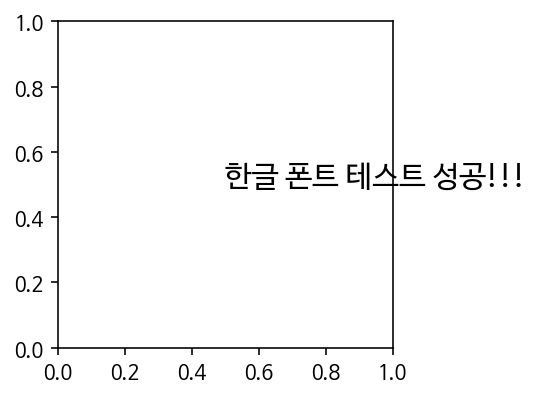

In [3]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
#!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [92]:
mpg = pd.read_csv('G:/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [93]:
mpg.columns = ["제조회사","모델","배기량","생산연도","실린더 개수","변속기 종류","구동방식","도시연비","고속도로 연비","연료 종류","자동차 종류"]

In [94]:
mpg.columns
mpg

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [7]:
# 결측치 확인
import missingno
missingno.matrix(mpg)

ModuleNotFoundError: No module named 'missingno'

## Q1 자동차 배기량에 따라 고속도로 연비가 다른지 알아보자
displ(배기량)이 4 이하인 자동차와 5 이상인 자동차 중 어떤 자동차의 hwy(연비)가 평균적으로 높은가?

In [8]:
mpg_under_4 = mpg[mpg["배기량"] <= 4].copy()
mpg_over_5 = mpg[mpg["배기량"] >= 5].copy()

In [9]:
print(mpg_under_4["고속도로 연비"].mean())
mpg_over_5["고속도로 연비"].mean()

25.96319018404908


18.07894736842105

In [89]:
# 변수에 저장하지않고 비교하기
print(mpg[mpg["배기량"] <= 4]["고속도로 연비"].mean())
mpg[mpg["배기량"] >= 5]["고속도로 연비"].mean()

25.96319018404908


18.07894736842105

In [ ]:
# sns.scatterplot("total_bill", "tip", data=df, ax=ax[0])
# fig
# sns.stripplot("size", "tip", data=df, ax=ax[1])
# fig

## Q2. 자동차 제조 회사에 따라 도시 연비가 다른지 알아보자. "audi"와 "toyota" 중 어느 manufacturer의 cty가 평균적으로 높은지 알아 보자

In [107]:
mpg.head()
mpg.groupby(["제조회사"])['도시연비'].mean().sort_values()

제조회사
lincoln       11.333333
land rover    11.500000
dodge         13.135135
mercury       13.250000
jeep          13.500000
ford          14.000000
chevrolet     15.000000
pontiac       17.000000
audi          17.611111
nissan        18.076923
toyota        18.529412
hyundai       18.642857
subaru        19.285714
volkswagen    20.925926
honda         24.444444
Name: 도시연비, dtype: float64

## Q3. "chevrolet", "ford", "honda" 자동차의 고속도로 연비 평균을 알아보자. 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 구해 보자.



In [20]:
df1= mpg[mpg["제조회사"] == 'chevrolet'].copy()
df2= mpg[mpg["제조회사"] =='ford'].copy()
df3= mpg[mpg["제조회사"] == 'honda'].copy()

df4= pd.concat([df1,df2,df3])
df4
print(df4["고속도로 연비"].mean())

22.50943396226415


## Q4. mpg 데이터에서 class(자동차 종류), cty(도시 연비) 변수를 추출해 새로운 데이터를 만들어라

,자동차 종류,도시연비
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16
...,...,...
229,midsize,19
230,midsize,21
231,midsize,16
232,midsize,18


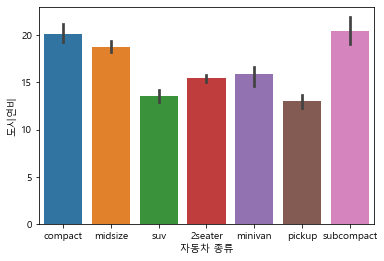

In [105]:
Q4=mpg[["자동차 종류","도시연비"]]
Q4
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font',family='Malgun Gothic')
plt.show()
sns.barplot(data=Q4,x="자동차 종류",y="도시연비")
Q4

## Q5. 자동차 종류에 따라 도시 연비가 다른지 알아보자. 앞에서 추출한 데이터로 class가 "suv"인 자동차와 "compact"인 자동차 중 어떤 자동차의 cty가 더 높은지 알아보자.

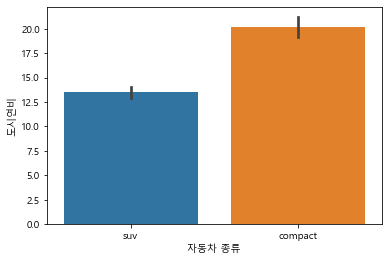

자동차 종류
suv        13.50000
compact    20.12766
Name: 도시연비, dtype: float64

In [108]:
Q4_suv=Q4[Q4["자동차 종류"] == "suv"].copy()
Q4_compact=Q4[Q4["자동차 종류"] == "compact"].copy()
Q5= pd.concat([Q4_suv,Q4_compact])
Q5
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font',family='Malgun Gothic')
sns.barplot(data=Q5,x="자동차 종류",y="도시연비")
plt.show()
Q5
Q5.groupby(["자동차 종류"])['도시연비'].mean().sort_values()

## Q6. "audi"에서 생산한 자동차 중 hwy가 높은 1~5위의 데이터를 출력하라.

In [69]:
Q6=mpg[mpg["제조회사"] == "audi"].copy()
Q6_1=Q6.sort_values(by='도시연비', ascending=False).groupby('제조회사').head(5)
Q6_1
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font',family='Malgun Gothic')
sns.barplot(data=Q6_1,x="모델",y="도시연비")

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,합산 연비,평균 연비
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,48,24.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,46,23.0


## Q7. mpg() 데이터 복사본을 만들고, cty와 hwy를 더한 '합산 연비 변수'를 추가하라.

In [95]:
mpg['합산 연비'] = mpg['도시연비'] + mpg['고속도로 연비']
mpg

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,합산 연비
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44


## Q8. 합산 연비 변수를 2로 나눠 평균 연비 변수를 추가하라.

In [96]:
mpg['평균 연비']=mpg['합산 연비']/2

## Q9. 평균 연비 변수가 가장 높은 자동차 3종의 데이터를 출력하라.


In [97]:
Q9=mpg.sort_values(by='평균 연비', ascending=False).groupby('제조회사').head(3)
Q9

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,합산 연비,평균 연비
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,65,32.5
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,61,30.5
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,61,30.5
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,61,30.5
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,61,30.5
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,60,30.0
144,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize,55,27.5


## Q10. 위에 3문제를 하나의 코드로 만들어 보라.

In [98]:
mpg['합산 연비'] = mpg['도시연비'] + mpg['고속도로 연비']
mpg['평균 연비']=mpg['합산 연비']/2

## Q11. mpg 데이터의 class는 "suv", "compact" 등 자동차를 특징에 따라 일곱 종류로 분류한 변수이다. 어떤 차종의 도시 연비가 높은지 비교해보자. class별 cty 평균을 구해보자.

In [114]:
Q11=mpg.sort_values(by='도시연비', ascending=False).groupby('자동차 종류').head()
Q11
Q11.groupby(["자동차 종류"])['도시연비'].mean().sort_values()

자동차 종류
2seater       15.4
pickup        15.8
minivan       17.0
suv           19.0
midsize       22.0
compact       27.4
subcompact    28.6
Name: 도시연비, dtype: float64

In [ ]:
mpg.groubby([''])

## Q12. 앞 문제의 출력 결과는 class 값 알파벳 순으로 정렬되어 있다. cty 평균이 높은 순으로 정렬해 출력하자.


In [115]:
Q11=mpg.sort_values(by='도시연비', ascending=False).groupby('자동차 종류').head()
Q11
Q11.groupby(["자동차 종류"])['도시연비'].mean().sort_values(ascending=False)

자동차 종류
subcompact    28.6
compact       27.4
midsize       22.0
suv           19.0
minivan       17.0
pickup        15.8
2seater       15.4
Name: 도시연비, dtype: float64

## Q13. 어떤 회사 자동차의 hwy가 가장 높은지 알아보고 hwy 평균이 높은 회사 세 곳을 출력하자.

In [120]:
Q12=mpg.sort_values(by='고속도로 연비', ascending=False).groupby('제조회사').head()
Q12
Q12.groupby(["제조회사"])['고속도로 연비'].mean().sort_values(ascending=False)

제조회사
volkswagen    37.4
toyota        34.2
honda         34.2
audi          29.4
nissan        29.2
hyundai       29.2
chevrolet     27.6
subaru        26.6
pontiac       26.4
ford          24.8
dodge         23.8
jeep          19.6
mercury       18.0
lincoln       17.0
land rover    16.5
Name: 고속도로 연비, dtype: float64

## Q14. 어떤 회사에서 "compact" 차종을 가장 많이 생산하는지 알아보자. 각 회사별 "compact" 차종 수를 내림차순으로 정렬해 출력하자.

In [125]:
Q14=mpg[mpg["자동차 종류"] == "compact"].copy()
Q14
Q14.groupby(["제조회사"])['자동차 종류'].count().sort_values(ascending=False)

제조회사
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: 자동차 종류, dtype: int64

## Q15. mpg 데이터에는 연료 종류를 나타낸 fl 변수는 있지만 연료 가격을 나타낸 변수는 없다. mpg 데이터에 price_fl를 추가하고 출력해보아라.